<a href="https://colab.research.google.com/github/yyyaoyuan/KAN--/blob/main/KAN_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pykan

**步骤 1**. 创建数据集

In [ ]:
from kan import *
import torch
torch.manual_seed(42)

# 创建一个 KAN：第一层是两个特征输入层节点（x, y），第二层是 5 个隐藏层节点，第三层是 1 个输出层节点 f(x, y)，k = 3 代表选择三次样条曲线，grid = 5 代表网格点为 5
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

# 创建数据集 f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2) # n_var = 2 代表有两个特征输入
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

**步骤 2**. 训练模型

train loss: 1.16e-01 | test loss: 1.18e-01 | reg: 3.93e+01 : 100%|██| 20/20 [00:09<00:00,  2.20it/s]


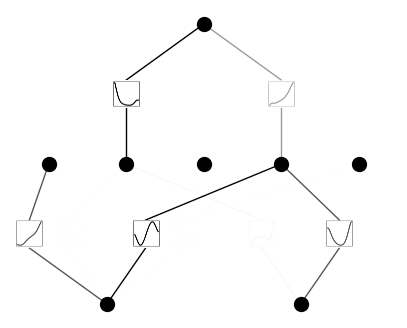

In [ ]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=20.);
model.plot()

**步骤 3**. 剪枝模型

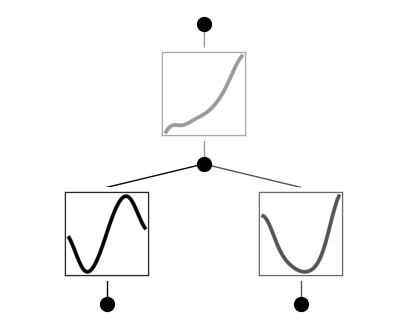

In [ ]:
model = model.prune()
model(dataset['train_input'])
model.plot()

**步骤 4**. 继续训练拟合数据

train loss: 7.26e-03 | test loss: 7.25e-03 | reg: 2.77e+00 : 100%|██| 50/50 [00:07<00:00,  6.79it/s]


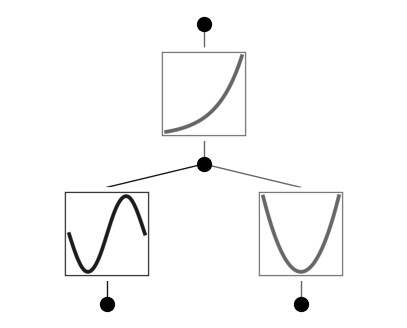

In [ ]:
model.train(dataset, opt="LBFGS", steps=50);
model.plot()

**步骤 5**. 自动或者手动设置每一个神经元对应的函数，这里我们选择自动设置

In [ ]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999707341194153
fixing (0,1,0) with x^2, r2=0.9999993443489075
fixing (1,0,0) with exp, r2=0.999998927116394


**步骤 6**. 选择好符号函数后，继续训练拟合数据

train loss: 2.04e-07 | test loss: 2.29e-07 | reg: 2.76e+00 : 100%|██| 50/50 [00:03<00:00, 14.72it/s]


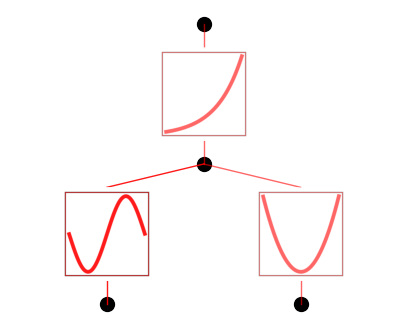

In [ ]:
model.train(dataset, opt="LBFGS", steps=50);
model.plot()

**步骤 7**. 输出拟合得到的函数

In [ ]:
model.symbolic_formula()[0][0]

1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))